## Confronto azionario con azionario+oro


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


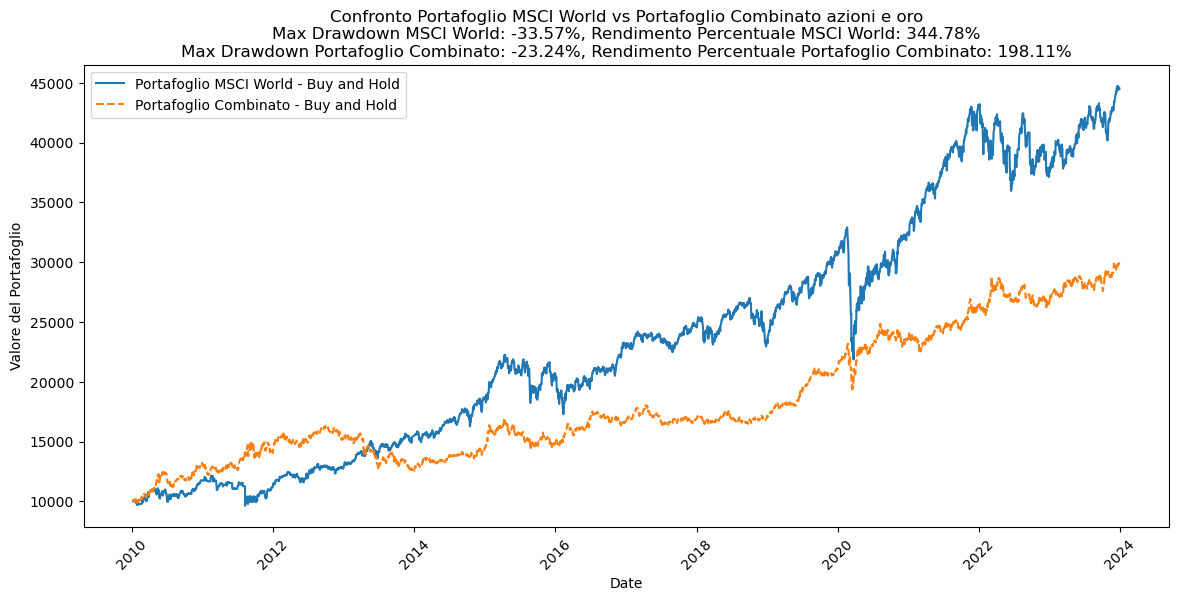

In [3]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Scarica i dati da Yahoo Finance
titolo_msci = "SWDA.MI"  # Simbolo Etf MSCI World
titolo_oro = "PHAU.MI"  # Simbolo Etf su oro

msci_data = yf.download(titolo_msci, start='2010-01-01', end='2024-01-01')
oro_data = yf.download(titolo_oro, start='2010-01-01', end='2024-01-01')

msci_dates = msci_data.index
oro_dates = oro_data.index

msci_adj_close = msci_data['Adj Close'].values
oro_adj_close = oro_data['Adj Close'].values

# Calcola il rendimento giornaliero di MSCI World
rendimento_giornaliero_msci = np.diff(msci_adj_close) / msci_adj_close[:-1]

# Inizializza il portafoglio buy and hold solo per MSCI World
investimento_msci = 10000
portafoglio_msci = investimento_msci * (1 + rendimento_giornaliero_msci).cumprod()

# Calcola il rendimento giornaliero combinato di MSCI World e Oro
rendimento_giornaliero_combinato = (3000 * rendimento_giornaliero_msci + 7000 * np.diff(oro_adj_close) / oro_adj_close[:-1]) / 10000

# Inizializza il portafoglio buy and hold combinato
portafoglio_combinato = investimento_msci * (1 + rendimento_giornaliero_combinato).cumprod()

# Calcola il massimo drawdown per entrambi i portafogli
def calculate_drawdown(portfolio_values):
    previous_peaks = np.maximum.accumulate(portfolio_values)
    drawdowns = (portfolio_values - previous_peaks) / previous_peaks
    max_drawdown = np.min(drawdowns)
    return max_drawdown

max_drawdown_msci = calculate_drawdown(portafoglio_msci)
max_drawdown_combinato = calculate_drawdown(portafoglio_combinato)

# Calcola il rendimento percentuale per entrambi i portafogli
rendimento_percentuale_msci = (portafoglio_msci[-1] - investimento_msci) / investimento_msci * 100
rendimento_percentuale_combinato = (portafoglio_combinato[-1] - investimento_msci) / investimento_msci * 100

# Aggiungi le informazioni al titolo del grafico
titolo_grafico = f'Confronto Portafoglio MSCI World vs Portafoglio Combinato azioni e oro\n' \
                 f'Max Drawdown MSCI World: {max_drawdown_msci:.2%}, Rendimento Percentuale MSCI World: {rendimento_percentuale_msci:.2f}%\n' \
                 f'Max Drawdown Portafoglio Combinato: {max_drawdown_combinato:.2%}, Rendimento Percentuale Portafoglio Combinato: {rendimento_percentuale_combinato:.2f}%'

# Visualizza il risultato
plt.figure(figsize=(14, 6))
plt.plot(msci_dates[1:], portafoglio_msci, label='Portafoglio MSCI World - Buy and Hold')
plt.plot(msci_dates[1:], portafoglio_combinato, label='Portafoglio Combinato - Buy and Hold', linestyle='--')
plt.title(titolo_grafico)
plt.xlabel('Date')
plt.ylabel('Valore del Portafoglio')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Confronto azionario con azionario+oro+obbligazioni


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


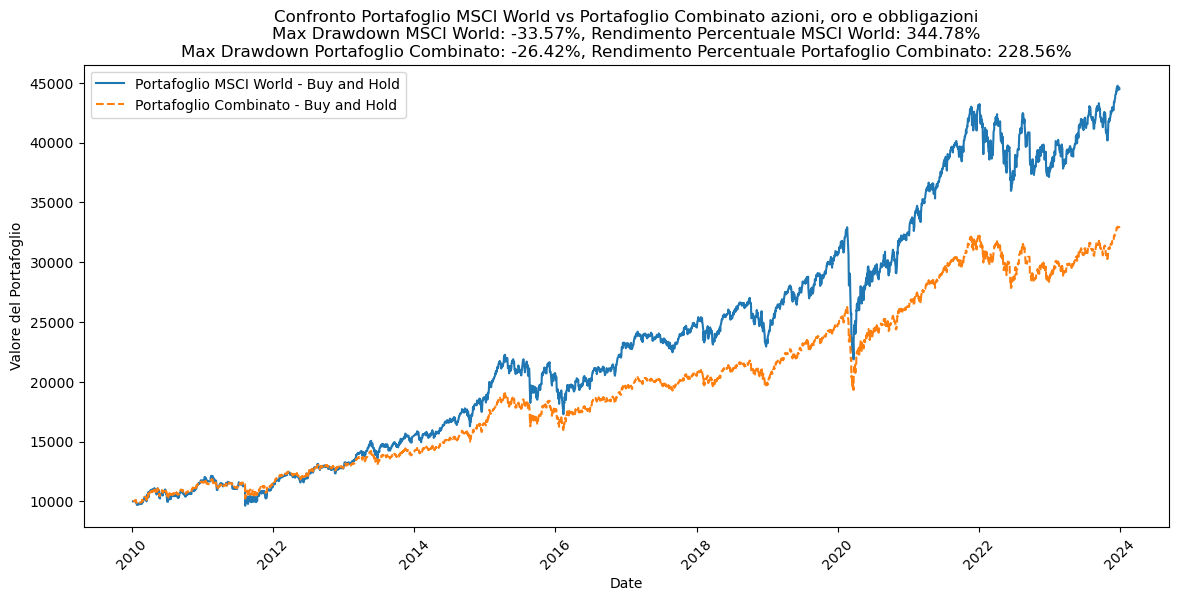

In [6]:
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Funzione per calcolare il massimo drawdown
def calcola_massimo_drawdown(portafoglio):
    picchi = np.maximum.accumulate(portafoglio)
    drawdown = (portafoglio - picchi) / picchi
    massimo_drawdown = np.min(drawdown)
    return massimo_drawdown

# Scarica i dati da Yahoo Finance
titolo_msci = "SWDA.MI"  # Simbolo Etf MSCI World
titolo_oro = "PHAU.MI"  # Simbolo Etf su oro
titolo_obbligazioni = "IEAC.MI"  # Simbolo Etf su obbligazioni


msci = yf.download(titolo_msci, start='2010-01-01', end='2024-01-01')['Adj Close'].dropna().values
oro = yf.download(titolo_oro, start='2010-01-01', end='2024-01-01')['Adj Close'].dropna().values
obbligazioni = yf.download(titolo_obbligazioni, start='2010-01-01', end='2024-01-01')['Adj Close'].dropna().values

# Calcola il rendimento giornaliero di MSCI World, Oro e Obbligazioni
rendimento_giornaliero_msci = np.diff(msci) / msci[:-1]
rendimento_giornaliero_oro = np.diff(oro) / oro[:-1]
rendimento_giornaliero_obbligazioni = np.diff(obbligazioni) / obbligazioni[:-1]

# Inizializza il portafoglio buy and hold solo per MSCI World
investimento_msci = 10000
portafoglio_msci = investimento_msci * (1 + rendimento_giornaliero_msci).cumprod()

# Calcola il rendimento giornaliero combinato di MSCI World, Oro e Obbligazioni
rendimento_giornaliero_combinato = (
    (7000 * rendimento_giornaliero_msci) +
    (1000 * rendimento_giornaliero_oro) +
    (2000 * rendimento_giornaliero_obbligazioni)
) / 10000

# Inizializza il portafoglio buy and hold combinato
portafoglio_combinato = investimento_msci * (1 + rendimento_giornaliero_combinato).cumprod()

# Calcola il massimo drawdown per i due portafogli
massimo_drawdown_msci = calcola_massimo_drawdown(portafoglio_msci)
massimo_drawdown_combinato = calcola_massimo_drawdown(portafoglio_combinato)

# Calcola il rendimento percentuale per i due portafogli
rendimento_percentuale_msci = (portafoglio_msci[-1] - investimento_msci) / investimento_msci * 100
rendimento_percentuale_combinato = (portafoglio_combinato[-1] - investimento_msci) / investimento_msci * 100

# Aggiungi le informazioni al titolo del grafico
titolo_grafico = f'Confronto Portafoglio MSCI World vs Portafoglio Combinato azioni, oro e obbligazioni\n' \
                 f'Max Drawdown MSCI World: {massimo_drawdown_msci:.2%}, Rendimento Percentuale MSCI World: {rendimento_percentuale_msci:.2f}%\n' \
                 f'Max Drawdown Portafoglio Combinato: {massimo_drawdown_combinato:.2%}, Rendimento Percentuale Portafoglio Combinato: {rendimento_percentuale_combinato:.2f}%'

# Visualizza il risultato
plt.figure(figsize=(14, 6))
plt.plot(msci_dates[1:], portafoglio_msci, label='Portafoglio MSCI World - Buy and Hold')
plt.plot(msci_dates[1:], portafoglio_combinato, label='Portafoglio Combinato - Buy and Hold', linestyle='--')
plt.title(titolo_grafico)
plt.xlabel('Date')
plt.ylabel('Valore del Portafoglio')
plt.legend()
plt.xticks(rotation=45)
plt.show()

